<a href="https://colab.research.google.com/github/Rkinbag/Inter-face-challenge-/blob/main/interface_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
!pip uninstall -y pandas-profiling


Found existing installation: pandas-profiling 3.3.0
Uninstalling pandas-profiling-3.3.0:
  Successfully uninstalled pandas-profiling-3.3.0


In [118]:
pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.3.0-py2.py3-none-any.whl (268 kB)


In [119]:
import pandas as pd
from pandas_profiling import ProfileReport

In [120]:
import numpy as np

In [121]:
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [122]:
df = pd.read_csv('Train_churn.csv')


In [6]:
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [8]:
profile = ProfileReport(df,title='Churn')


In [9]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
ids = df['ID']                             
df.drop('ID', axis=1, inplace=True)

In [11]:
df.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6650 non-null   int64  
 1   Gender              6650 non-null   object 
 2   Income              6650 non-null   object 
 3   Balance             6650 non-null   float64
 4   Vintage             6650 non-null   int64  
 5   Transaction_Status  6650 non-null   int64  
 6   Product_Holdings    6650 non-null   object 
 7   Credit_Card         6650 non-null   int64  
 8   Credit_Category     6650 non-null   object 
 9   Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 519.7+ KB


In [14]:
cat_f=df[['Gender','Income','Product_Holdings','Credit_Category']]
num_f=df[['Age','Balance','Vintage','Transaction_Status','Credit_Card','Is_Churn']]

In [15]:
for i in cat_f:
  print(i,' ',df[i].unique())   

Gender   ['Female' 'Male']
Income   ['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L']
Product_Holdings   ['1' '2' '3+']
Credit_Category   ['Average' 'Poor' 'Good']


In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


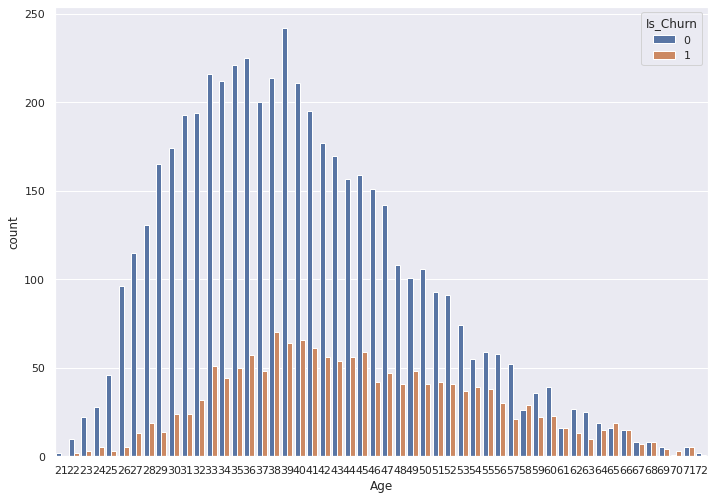

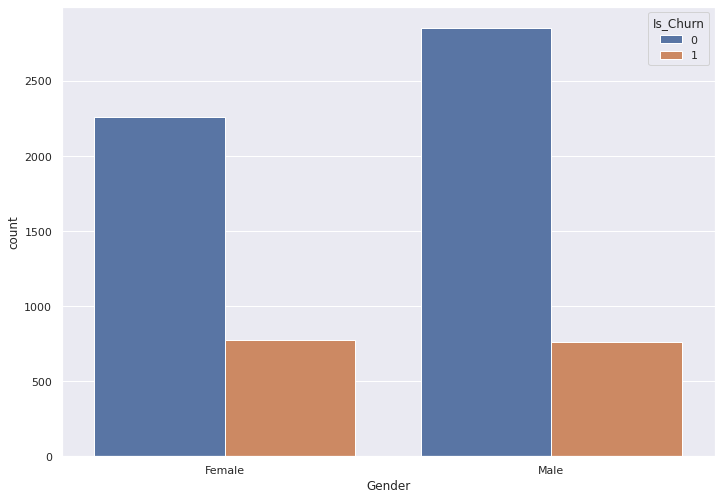

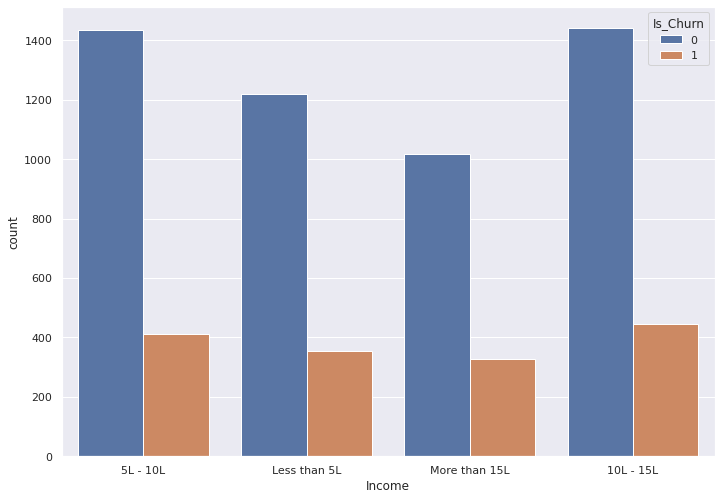

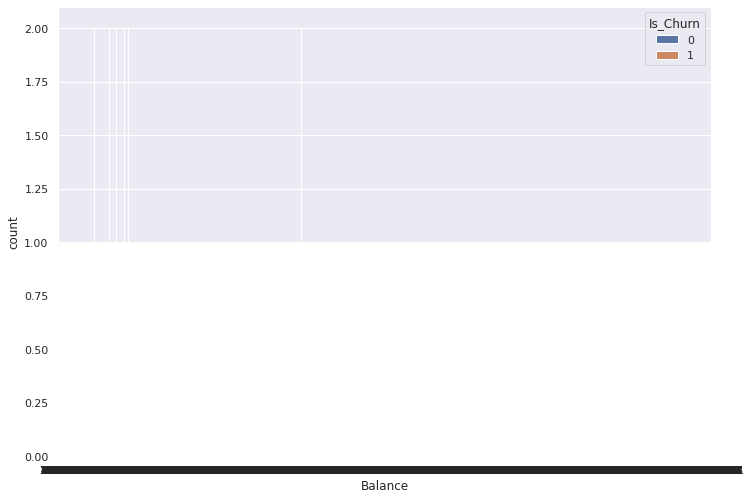

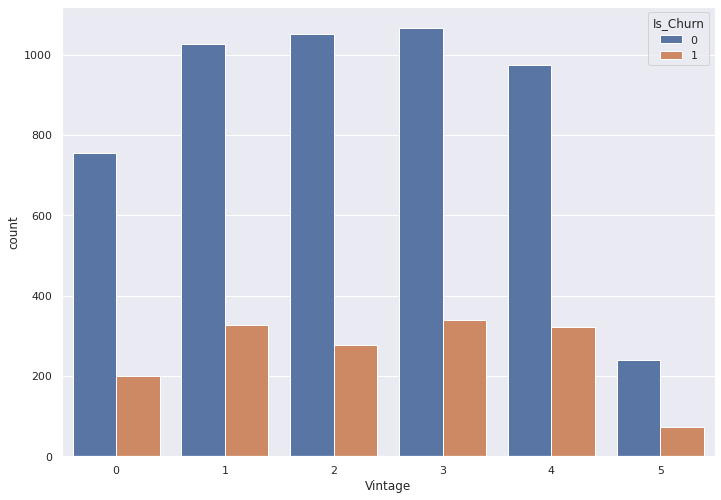

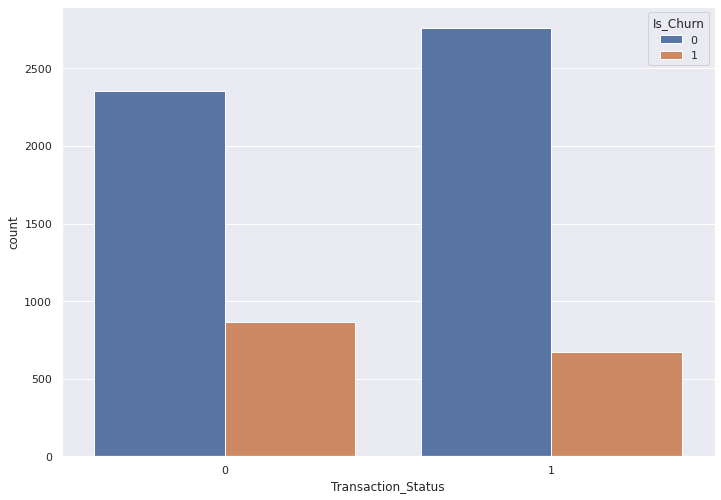

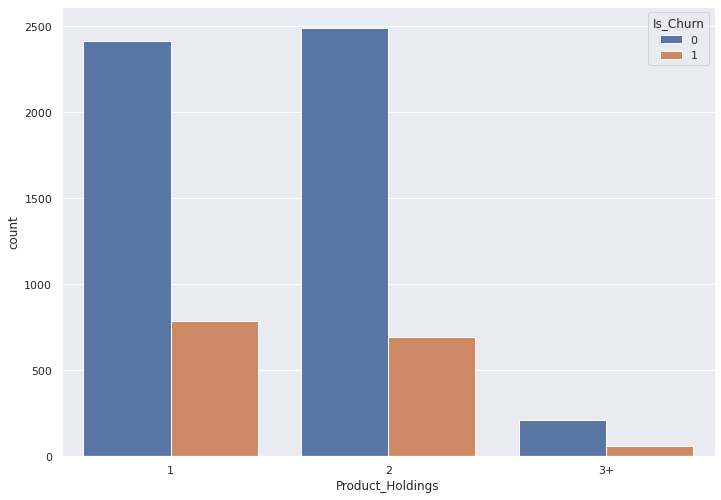

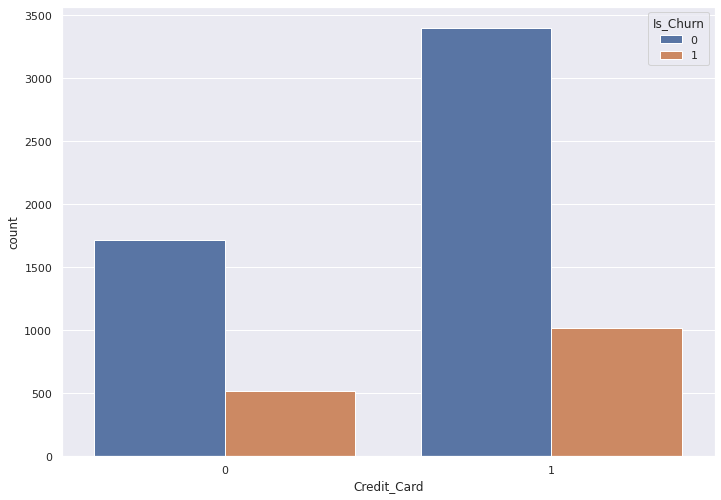

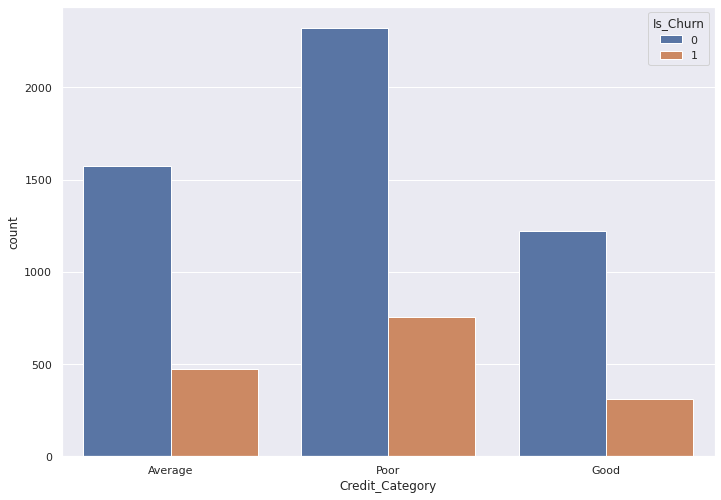

In [17]:
for i, predictor in enumerate(df.drop(columns='Is_Churn')):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Is_Churn')

# **Inferences**
### All the countplot above shows count of various features with hue of the target variable i.e Is_Churn

**1**.  Plot 1 shows that most customers are from age group 30-45, further we can notice that older customers have more churning proportion than of others. 

**2.**   Plot 2 shows that greater percentage of females are churning.

**3.** Plot 3 shows that customers with income > 10L are more likely to churn.

**4**. Plot 5 doesnt explain relation of vintage with churn, we can do this by calculating proportions mathematically later.

**5**.Plot 6 shows that the customers who have done a transaction in last 3 months are more likely to churn.

**6**.Plot 7 shows that customer with product holding >3 are relatively less than with customers having product holding with 1 and 2, further graph tells that customers with product holding 1 have more proportion of churners.

**7.** Plot 8 shows that customers with credit card and customers which dont have credit card are equally likely to churn.

**8.** Plot 9 shows that customers with poor credit score are more and they are likely to churn more than other two categories.



(array([ 39., 183., 278., 594., 493., 809., 532., 839., 457., 624., 487.,
        282., 337., 185., 186.,  94., 109.,  65.,  40.,  17.]),
 array([21.  , 23.55, 26.1 , 28.65, 31.2 , 33.75, 36.3 , 38.85, 41.4 ,
        43.95, 46.5 , 49.05, 51.6 , 54.15, 56.7 , 59.25, 61.8 , 64.35,
        66.9 , 69.45, 72.  ]),
 <a list of 20 Patch objects>)

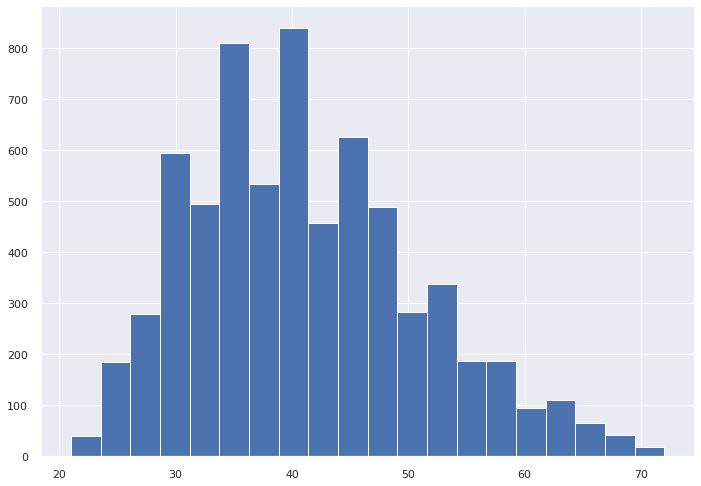

In [ ]:
plt.hist(df['Age'],bins=20)

(array([614., 537., 416., 460., 544., 573., 587., 552., 512., 430., 354.,
        301., 235., 181., 135.,  79.,  53.,  28.,  32.,  27.]),
 array([6.30000000e+01, 1.21890641e+05, 2.43718281e+05, 3.65545922e+05,
        4.87373562e+05, 6.09201203e+05, 7.31028843e+05, 8.52856484e+05,
        9.74684124e+05, 1.09651176e+06, 1.21833941e+06, 1.34016705e+06,
        1.46199469e+06, 1.58382233e+06, 1.70564997e+06, 1.82747761e+06,
        1.94930525e+06, 2.07113289e+06, 2.19296053e+06, 2.31478817e+06,
        2.43661581e+06]),
 <a list of 20 Patch objects>)

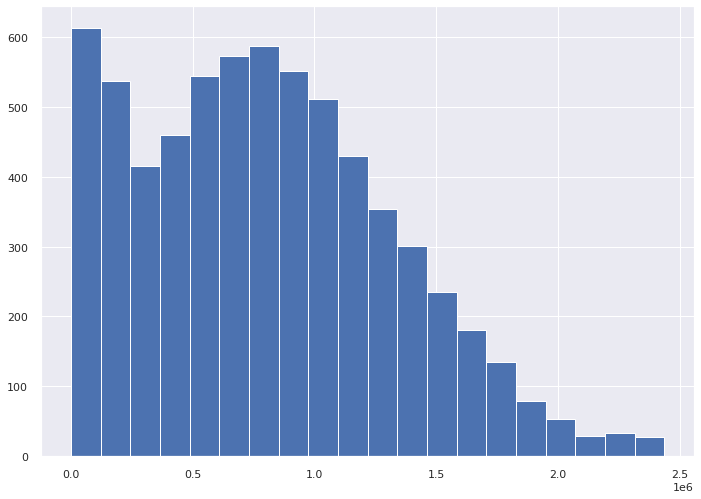

In [ ]:
plt.hist(df['Balance'],bins=20)

Text(0.5, 1.0, 'Ages by churn')

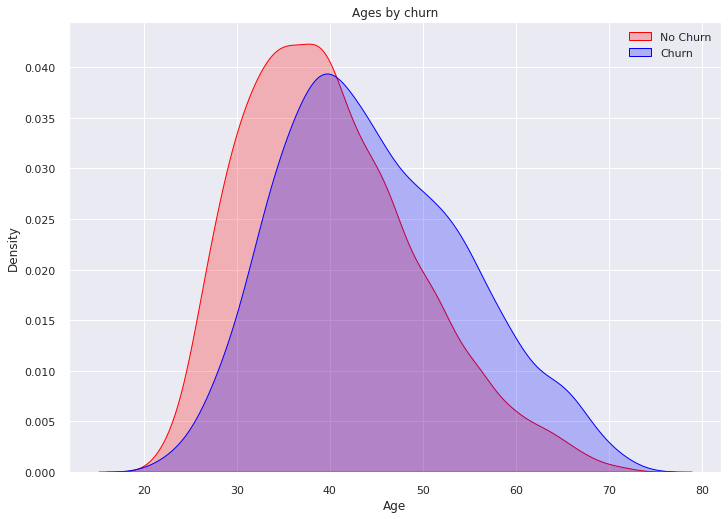

In [ ]:
Tot = sns.kdeplot(df.Age[(df["Is_Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.Age[(df["Is_Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Ages by churn')

**This density plot again confirms the results from countplot, we can see when age is less <40 non churners are relatively higher and when the age is >50 the customers are more likely to churn**

Text(0.5, 1.0, 'Customer Balances by churn')

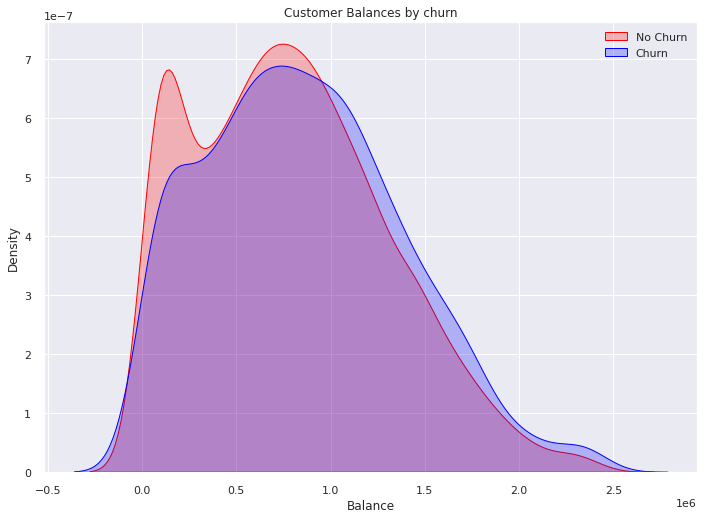

In [ ]:
Tot = sns.kdeplot(df.Balance[(df["Is_Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.Balance[(df["Is_Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title('Customer Balances by churn')

**Below all the calculations shows proportions of churners with various categories present in the particular feature**

In [ ]:
df[['Credit_Card','Is_Churn']].groupby('Credit_Card').mean()


,Is_Churn
Credit_Card,
0,0.231631
1,0.230874


In [ ]:
df[['Credit_Category','Is_Churn']].groupby('Credit_Category').mean()


,Is_Churn
Credit_Category,
Average,0.230543
Good,0.203135
Poor,0.245449


In [ ]:
df[['Income','Is_Churn']].groupby('Income').mean()


,Is_Churn
Income,
10L - 15L,0.235544
5L - 10L,0.223064
Less than 5L,0.225048
More than 15L,0.243123


In [ ]:
df[['Gender','Is_Churn']].groupby('Gender').mean()


,Is_Churn
Gender,
Female,0.25576
Male,0.21041


In [204]:
df[['Product_Holdings','Is_Churn']].groupby('Product_Holdings').mean()


,Is_Churn
Product_Holdings,
1,0.245625
2,0.217473
3+,0.220149


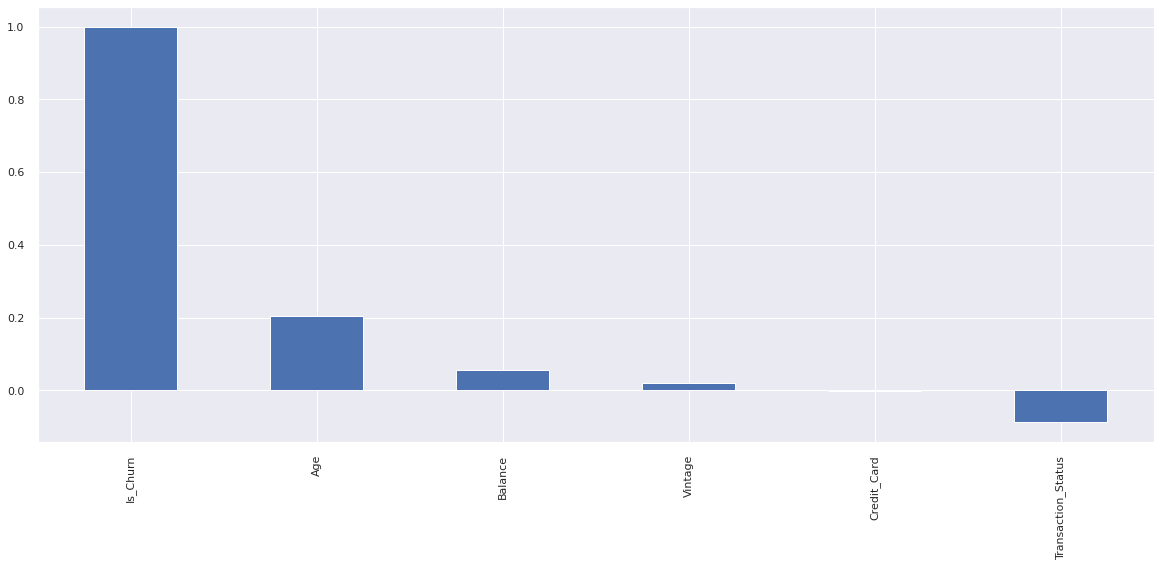

In [ ]:
plt.figure(figsize=(20,8))
df.corr()['Is_Churn'].sort_values(ascending = False).plot(kind='bar')

**Coorelation chart, the continous feature such as age and balance make sense because other features are binary**

In [18]:
df['Product_Holdings'] = df['Product_Holdings'].map({'1': 1, '2': 2, '3+': 3})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

Maping categories of few features to numerical values

In [19]:
df

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,0,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,0,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,0,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,0,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...
6645,61,1,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,42,0,5L - 10L,596286.54,3,1,2,1,Average,0
6647,29,1,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,66,0,10L - 15L,395233.65,3,0,2,1,Poor,1


In [20]:
df.replace({"Less than 5L": 0, "5L - 10L": 1, "10L - 15L": 2, "More than 15L": 3}, inplace = True)


In [21]:
df

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,1,563266.44,4,0,1,0,Average,1
1,53,0,0,875572.11,2,1,1,1,Poor,0
2,35,0,3,701607.06,2,1,2,0,Poor,0
3,43,0,3,1393922.16,0,1,2,1,Poor,1
4,39,0,3,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...
6645,61,1,1,1354526.19,4,1,2,1,Poor,1
6646,42,0,1,596286.54,3,1,2,1,Average,0
6647,29,1,0,979298.19,2,0,2,0,Poor,0
6648,66,0,2,395233.65,3,0,2,1,Poor,1


In [22]:
df.replace({"Poor": 0, "Average": 1, "Good": 2}, inplace = True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6650 non-null   int64  
 1   Gender              6650 non-null   int64  
 2   Income              6650 non-null   int64  
 3   Balance             6650 non-null   float64
 4   Vintage             6650 non-null   int64  
 5   Transaction_Status  6650 non-null   int64  
 6   Product_Holdings    6650 non-null   int64  
 7   Credit_Card         6650 non-null   int64  
 8   Credit_Category     6650 non-null   int64  
 9   Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 519.7 KB


In [24]:
df

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,1,563266.44,4,0,1,0,1,1
1,53,0,0,875572.11,2,1,1,1,0,0
2,35,0,3,701607.06,2,1,2,0,0,0
3,43,0,3,1393922.16,0,1,2,1,0,1
4,39,0,3,893146.23,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
6645,61,1,1,1354526.19,4,1,2,1,0,1
6646,42,0,1,596286.54,3,1,2,1,1,0
6647,29,1,0,979298.19,2,0,2,0,0,0
6648,66,0,2,395233.65,3,0,2,1,0,1


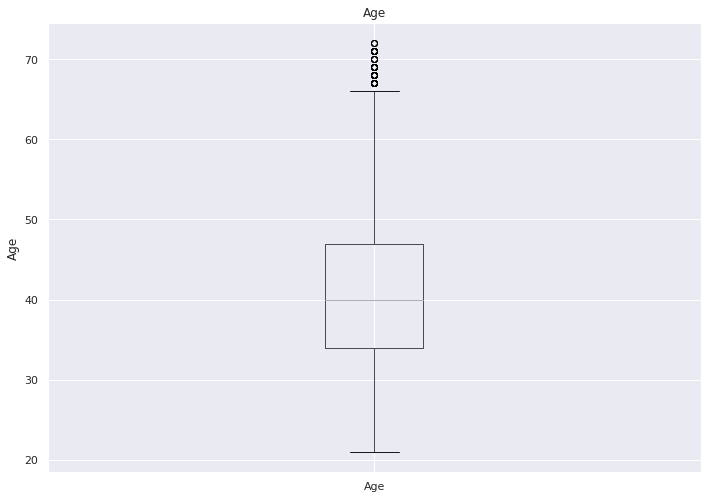

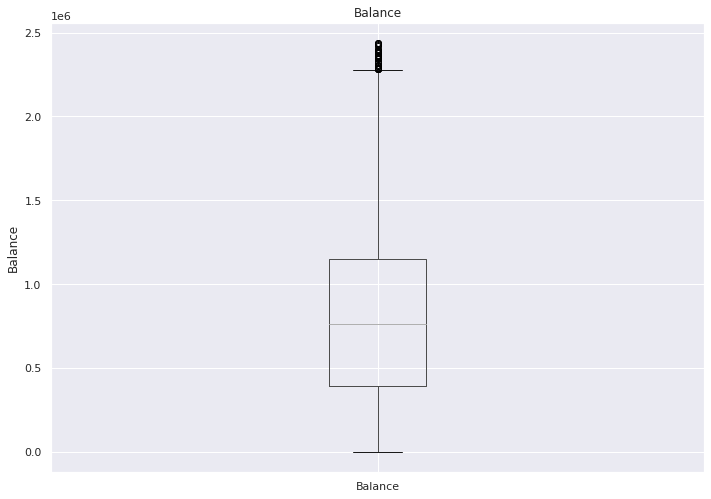

In [25]:
for feature in df[['Age','Balance']]:
    data=df
    if 0 in data[feature].unique():
        pass
    else:
        
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Box plot shows that outliers are present in Balance and Age feature

In [26]:
def upper_bound(df, feature):
    
    per25 = np.percentile(df[feature], 25)
    per75 = np.percentile(df[feature], 75)
    iqr = per75 - per25
    lower = per25 - (1.5*iqr)
    upper = per75 + (1.5*iqr)
    return upper

In [27]:
print('In age', df[df['Age']>upper_bound(df, 'Age')].shape[0], ' In Balance: ', df[df['Balance']>upper_bound(df, 'Balance')].shape[0])


In age 57  In Balance:  38


In [28]:
df['Age'] = df['Age'].apply(lambda x: round(upper_bound(df, 'Age')) if (x > upper_bound(df, 'Age')) else x)
df['Balance'] = df['Balance'].apply(lambda x: round(upper_bound(df, 'Balance')) if (x > upper_bound(df, 'Balance')) else x)

**Caping the outliers, meaning replacing them with upper value wich is 75th percentile + 1.5 IQR**

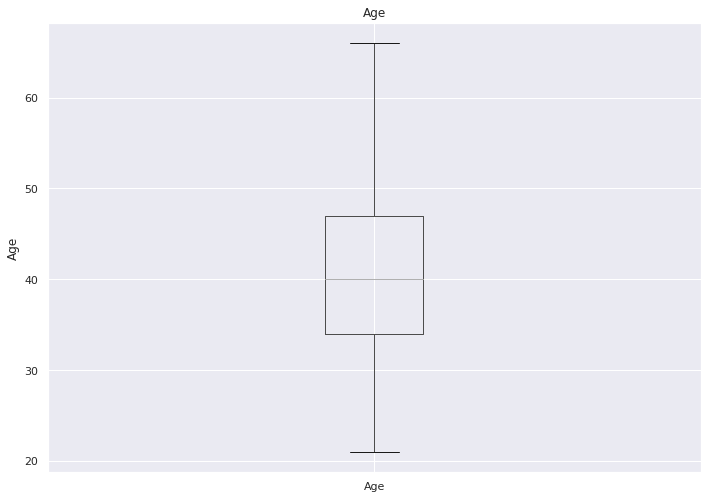

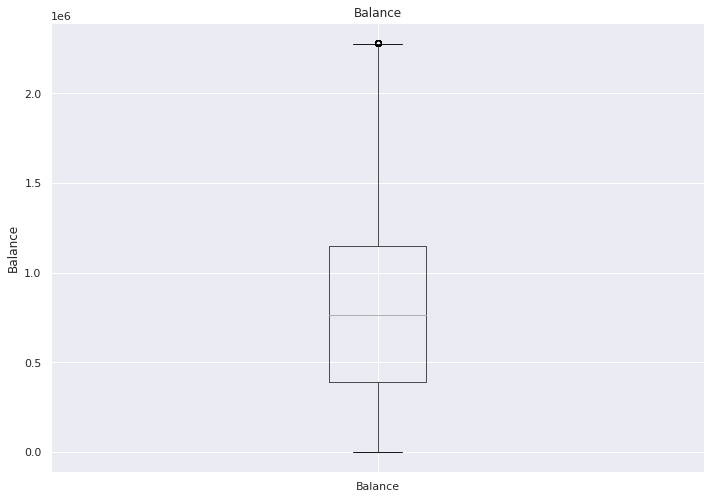

In [29]:
for feature in df[['Age','Balance']]:
    data=df
    if 0 in data[feature].unique():
        pass
    else:
        
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler


([<matplotlib.axis.XTick at 0x7f7032ba3290>,
 [Text(0, 0, 'Age'), Text(0, 0, 'Balance')])

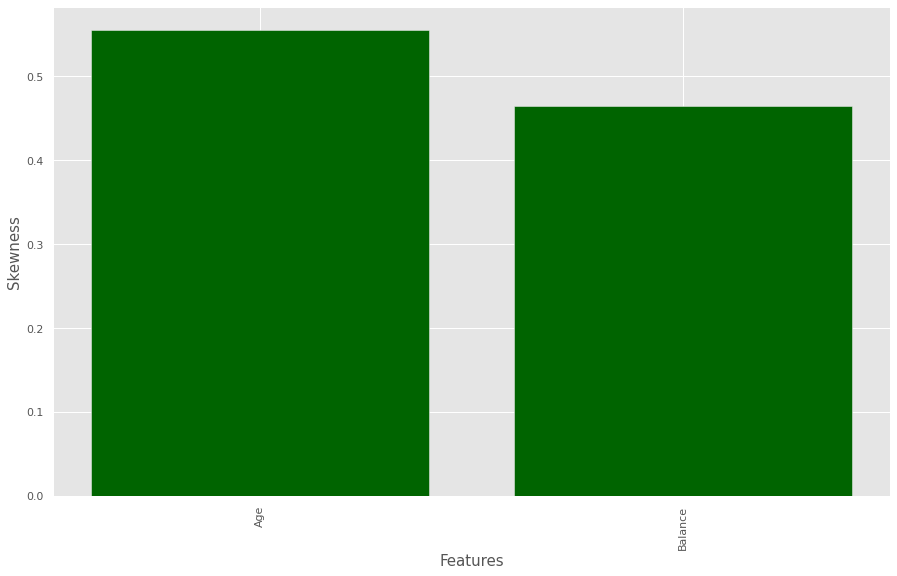

In [206]:
from scipy import stats

#Calculating Skewness index for all numerical features
skewness_list = {}
for i in df[['Age','Balance']]:
    if df[i].dtype != "object":
        skewness_list[i] = stats.skew(df[i])

#Plotting the Skewness data
skewness = pd.DataFrame({'Skew' :skewness_list})
plt.figure(figsize=(15,9))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.bar(range(len(skewness_list)), list(skewness_list.values()), align='center',color='darkgreen')
plt.xticks(range(len(skewness_list)), list(skewness_list.keys()), rotation='90')


**Skewness of numerical features**

In [32]:

import scipy.stats

In [33]:
df1=df.copy()

In [34]:
skew_df = pd.DataFrame(df1.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df1[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Age,0.516624,0.516624,True
1,Gender,-0.173278,0.173278,False
2,Income,0.041117,0.041117,False
3,Balance,0.449127,0.449127,False
4,Vintage,0.021416,0.021416,False
5,Transaction_Status,-0.063189,0.063189,False
6,Product_Holdings,0.414123,0.414123,False
7,Credit_Card,-0.696130,0.696130,True
8,Credit_Category,0.441572,0.441572,False
9,Is_Churn,1.275624,1.275624,True


In [35]:
Y=df1['Is_Churn']
df1=df1.drop(columns='Is_Churn')


In [37]:
df1['Age'] = np.log1p(df1['Age'])

In [38]:
from sklearn.preprocessing import StandardScaler


In [39]:
scaler = StandardScaler()
num_features = ['Vintage','Age', 'Balance']

df1[num_features] = scaler.fit_transform(df1[num_features])

df1.head()


,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,-18.410394,0,1,-1.563016,-0.720285,0,1,0,1
1,-11.047305,0,0,-1.563014,-1.660240,1,1,1,0
2,-18.944008,0,3,-1.563015,-1.660240,1,2,0,0
3,-15.035812,0,3,-1.563013,-2.600194,1,2,1,0
4,-16.892041,0,3,-1.563014,-2.130217,1,1,1,2


In [87]:
data7=df1.copy()
data7.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,-18.410394,0,1,-1.563016,-0.720285,0,1,0,1
1,-11.047305,0,0,-1.563014,-1.660240,1,1,1,0
2,-18.944008,0,3,-1.563015,-1.660240,1,2,0,0
3,-15.035812,0,3,-1.563013,-2.600194,1,2,1,0
4,-16.892041,0,3,-1.563014,-2.130217,1,1,1,2


In [41]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier


In [42]:
from sklearn.model_selection import train_test_split


In [43]:
from sklearn.ensemble import RandomForestClassifier  


In [44]:
x_train, x_test, y_train, y_test = train_test_split(data7, Y, test_size=0.3, random_state=42)

In [45]:
from sklearn.metrics import accuracy_score


In [46]:
rf= RandomForestClassifier(max_depth=13, max_features=8, n_estimators=400, bootstrap=True, min_samples_leaf=3, min_samples_split=5)
rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=13, max_features=8, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=400)

In [47]:
y_pred_test1 = rf.predict(x_test)


In [48]:
accuracy_score(y_test, y_pred_test1)


0.7634085213032581

In [49]:
print(classification_report(y_test, y_pred_test1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86      1548
           1       0.39      0.09      0.15       447

    accuracy                           0.76      1995
   macro avg       0.59      0.53      0.51      1995
weighted avg       0.70      0.76      0.70      1995



In [50]:
from imblearn.combine import SMOTEENN


In [51]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(data7,Y)

In [52]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.3)

In [53]:
rf= RandomForestClassifier(max_depth=13, max_features=8, n_estimators=400, bootstrap=True, min_samples_leaf=3, min_samples_split=5)
rf.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=13, max_features=8, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=400)

In [54]:
y_pred_test = rf.predict(xr_test)



In [55]:
accuracy_score(yr_test, y_pred_test)


0.8721291123525761

In [56]:
print(classification_report(yr_test, y_pred_test, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.90      0.78      0.84       678
           1       0.86      0.94      0.89       933

    accuracy                           0.87      1611
   macro avg       0.88      0.86      0.87      1611
weighted avg       0.87      0.87      0.87      1611



In [ ]:
pip install pycaret 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *


In [ ]:
qq=setup(data=pd.concat([xr_train,yr_train], axis=1),target='Is_Churn',session_id=123)



,Description,Value
0,session_id,123
1,Target,Is_Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3856, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Is_Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8781,0.9479,0.9210,0.8820,0.9009,0.7428,0.7446,0.861
et,Extra Trees Classifier,0.8625,0.9395,0.9118,0.8670,0.8886,0.7095,0.7117,0.730
lightgbm,Light Gradient Boosting Machine,0.8618,0.9377,0.8994,0.8750,0.8866,0.7096,0.7112,0.105
gbc,Gradient Boosting Classifier,0.8362,0.9145,0.8803,0.8524,0.8659,0.6557,0.6570,0.561
knn,K Neighbors Classifier,0.8303,0.9001,0.9112,0.8257,0.8660,0.6364,0.6433,0.125
dt,Decision Tree Classifier,0.8099,0.7984,0.8556,0.8330,0.8438,0.6011,0.6024,0.036
ada,Ada Boost Classifier,0.7973,0.8791,0.8550,0.8166,0.8351,0.5724,0.5744,0.268
lda,Linear Discriminant Analysis,0.7425,0.8110,0.8199,0.7677,0.7924,0.4539,0.4568,0.036
lr,Logistic Regression,0.7395,0.8087,0.8199,0.7644,0.7907,0.4468,0.4498,0.400
ridge,Ridge Classifier,0.7395,0.0000,0.8192,0.7646,0.7905,0.4470,0.4499,0.033


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
data7.shape

(6650, 9)

In [ ]:
grid_param={
    'n_estimators':[90,100,115,130],
    'criterion':['gini','entropy'],
    'max_depth': range(2,20,1),
    'min_samples_leaf' : range(2,20,1),
    'max_features' : ['auto','log2']



}

In [ ]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [ ]:
grid_search.fit(xr_train,yr_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 3868 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 4604 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 5404 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 6268 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 8188 tasks      | elapsed: 36.5m

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=13,
                                              max_features=8,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=3,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=400, n_jobs=None,
                                              oob_score=False,
                                              random_state

In [ ]:
print ('Best Parameters: ', grid_search.best_params_, ' \n')

Best Parameters:  {'criterion': 'entropy', 'max_depth': 19, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 115}  



In [92]:
randmf1 = RandomForestClassifier(n_estimators = 115, min_samples_leaf= 2, max_features = 'auto', max_depth= 19) 
randmf1.fit( xr_train, yr_train) 

RandomForestClassifier(max_depth=19, min_samples_leaf=2, n_estimators=115)

In [93]:
y_pred_testht2 = randmf1.predict(xr_test)
accuracy_score(yr_test, y_pred_testht2)

0.8789571694599627

In [83]:
grid_param11={
    'n_estimators':[100,115,130],
    'criterion':['gini','entropy'],
    'max_depth': range(19,25,1),
    'min_samples_leaf' : range(2,5,1),
    'max_features' : ['auto','log2'],
    'min_samples_split' : [2, 6, 10] 


}

In [84]:
grid_search1=GridSearchCV(estimator=rf,param_grid=grid_param11,cv=5,n_jobs=-1,verbose=3)

In [88]:
grid_search1.fit(xr_train,yr_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=13, max_features=8,
                                              min_samples_leaf=3,
                                              min_samples_split=5,
                                              n_estimators=400),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(19, 25),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [100, 115, 130]},
             verbose=3)

In [89]:
print ('Best Parameters: ', grid_search1.best_params_, ' \n')

Best Parameters:  {'criterion': 'entropy', 'max_depth': 22, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 115}  



In [90]:
randmf = RandomForestClassifier(n_estimators = 115, min_samples_split = 2, min_samples_leaf= 2, max_features = 'auto', max_depth= 22) 
randmf.fit( xr_train, yr_train) 

RandomForestClassifier(max_depth=22, min_samples_leaf=2, n_estimators=115)

In [91]:
y_pred_testht1 = randmf.predict(xr_test)
accuracy_score(yr_test, y_pred_testht1)


0.8864059590316573

In [109]:
print(classification_report(yr_test, y_pred_testht1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       678
           1       0.87      0.94      0.91       933

    accuracy                           0.89      1611
   macro avg       0.89      0.88      0.88      1611
weighted avg       0.89      0.89      0.89      1611



In [98]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from numpy import mean
from numpy import std

In [104]:
extra_tree_model =  ExtraTreesClassifier(n_estimators = 100,
          criterion ='entropy', max_features = "auto")

In [105]:
extra_tree_model.fit(xr_train, yr_train)


ExtraTreesClassifier(criterion='entropy')

In [106]:
y_pred_testet = extra_tree_model.predict(xr_test)
accuracy_score(yr_test, y_pred_testet)

0.8994413407821229

In [107]:
print(classification_report(yr_test, y_pred_testet, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       678
           1       0.88      0.96      0.92       933

    accuracy                           0.90      1611
   macro avg       0.91      0.89      0.89      1611
weighted avg       0.90      0.90      0.90      1611



In [124]:
grid_paramet={
    'n_estimators':[90,100,115,130],
    'criterion':['entropy'],
    'max_depth': range(2,20,1),
    'min_samples_leaf' : range(2,5,1),
    'max_features' : ['auto']



}

In [125]:
et=ExtraTreesClassifier()

In [126]:
grid_searchet=GridSearchCV(estimator=et,param_grid=grid_paramet,cv=5,n_jobs=-1,verbose=3)

In [127]:
grid_searchet.fit(xr_train,yr_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(2, 20),
                         'max_features': ['auto'],
                         'min_samples_leaf': range(2, 5),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [128]:
print ('Best Parameters: ', grid_searchet.best_params_, ' \n')

Best Parameters:  {'criterion': 'entropy', 'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 90}  



In [132]:
ett = ExtraTreesClassifier(n_estimators = 90, min_samples_split = 2, max_features = 'auto', max_depth= 17,criterion= 'entropy') 
ett.fit( xr_train, yr_train) 

ExtraTreesClassifier(criterion='entropy', max_depth=17, n_estimators=90)

In [138]:
y_pred_testetht = ett.predict(xr_test)
accuracy_score(yr_test, y_pred_testetht)

0.8994413407821229

In [135]:
print(classification_report(yr_test, y_pred_testetht, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       678
           1       0.88      0.96      0.92       933

    accuracy                           0.90      1611
   macro avg       0.91      0.89      0.89      1611
weighted avg       0.90      0.90      0.90      1611



In [136]:
import lightgbm as lgb
from lightgbm import LGBMClassifier


In [137]:
model1 = LGBMClassifier()
model1.fit(xr_train, yr_train)

LGBMClassifier()

In [139]:
y_pred_testl = model1.predict(xr_test)
accuracy_score(yr_test, y_pred_testl)

0.8628181253879578

In [140]:
pip install verstack


      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
  Attempting uninstall: holidays
    Found existing installation: holidays 0.15
    Uninstalling holidays-0.15:
      Successfully uninstalled holidays-0.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires holidays>=0.13, but you have holidays 0.11.3.1 which is incompatible.


In [141]:
from verstack import LGBMTuner


Streaming output truncated to the last 5000 lines.
[768]	valid_0's binary_logloss: 0.274586
[769]	valid_0's binary_logloss: 0.27451
[770]	valid_0's binary_logloss: 0.274426
[771]	valid_0's binary_logloss: 0.27431
[772]	valid_0's binary_logloss: 0.274121
[773]	valid_0's binary_logloss: 0.274056
[774]	valid_0's binary_logloss: 0.273982
[775]	valid_0's binary_logloss: 0.27402
[776]	valid_0's binary_logloss: 0.274091
[777]	valid_0's binary_logloss: 0.274118
[778]	valid_0's binary_logloss: 0.274116
[779]	valid_0's binary_logloss: 0.274069
[780]	valid_0's binary_logloss: 0.273991
[781]	valid_0's binary_logloss: 0.273987
[782]	valid_0's binary_logloss: 0.273888
[783]	valid_0's binary_logloss: 0.273825
[784]	valid_0's binary_logloss: 0.273784
[785]	valid_0's binary_logloss: 0.273641
[786]	valid_0's binary_logloss: 0.273727
[787]	valid_0's binary_logloss: 0.273505
[788]	valid_0's binary_logloss: 0.273315
[789]	valid_0's binary_logloss: 0.273231
[790]	valid_0's binary_logloss: 0.273297
[791]	val

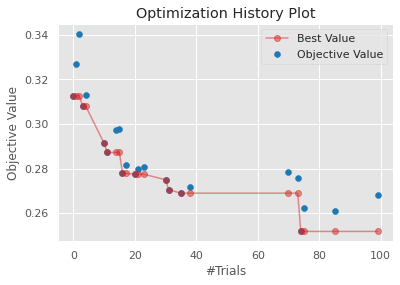

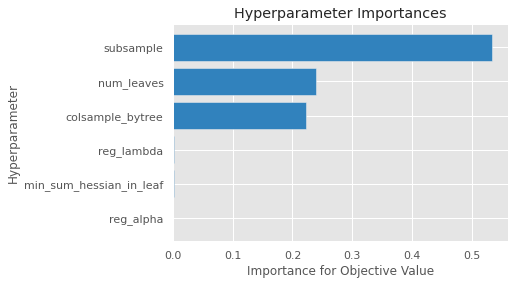

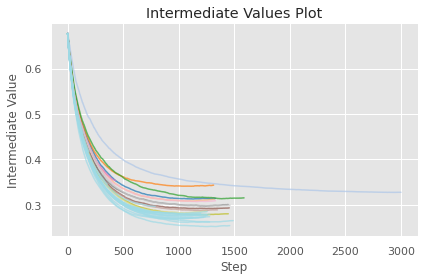

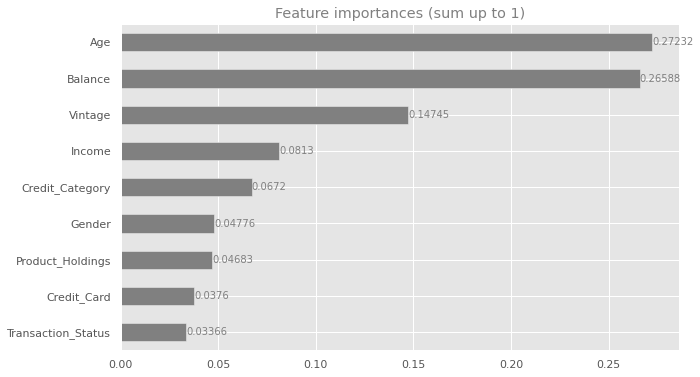


     . Optuna hyperparameters optimization finished
     .. Best trial number:74    |     log_loss:          0.25179539256680894
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  801   |     accuracy:           0.8776595744680851

Time elapsed for fit execution: 3 min 29.229 sec


In [148]:
tuner = LGBMTuner(metric = 'accuracy')
tuner.fit(xr_train, yr_train)

In [149]:
pred = tuner.predict(xr_test)

In [152]:
accuracy_score(yr_test, pred)

0.88268156424581

In [185]:
f_pred=(0.5*ett.predict(xr_test)+0.5*randmf.predict(xr_test))

In [186]:
print(f_pred.dtype)


float64


In [187]:
final_model = f_pred.astype('int64')


In [188]:
accuracy_score(yr_test, final_model)

0.9025450031036624

In [189]:
f_pred1=(0.4*ett.predict(xr_test)+0.4*randmf.predict(xr_test)+0.2*tuner.predict(xr_test))

In [190]:
f_pred1 = f_pred1.astype('int64')


In [191]:
accuracy_score(yr_test, f_pred1)

0.8932340161390441

In [192]:
print(classification_report(yr_test, final_model, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       678
           1       0.91      0.93      0.92       933

    accuracy                           0.90      1611
   macro avg       0.90      0.90      0.90      1611
weighted avg       0.90      0.90      0.90      1611

